1. 习题1

| 年 | 1814 |1824|1834|1844|1854|1864| 
|--- |---|---|---|---|---|---|
|数量| 125|275|830|1200|1750|1650|

In [62]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt

years = np.linspace(1814,1864,6,dtype=np.int)
num = np.array([125,275,830,1200,1750,1650])
years

array([1814, 1824, 1834, 1844, 1854, 1864])

Text(0.5, 1.0, '1814~1864 Sheep numbers')

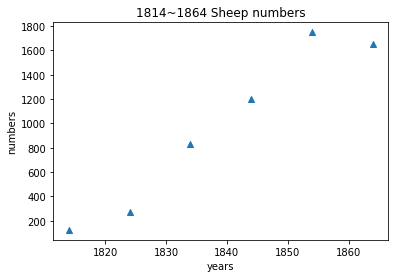

In [63]:
plt.scatter(years,num,marker='^')
plt.xlabel("years")
plt.ylabel("numbers")
plt.title("1814~1864 Sheep numbers")

In [10]:
from functools import reduce
dy = np.array([num[i+1]-num[i] for i in range(5)])
dy

array([ 150,  555,  370,  550, -100])

Text(0, 0.5, 'difference')

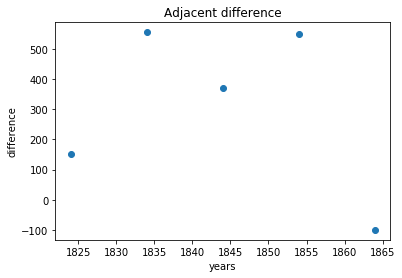

In [64]:
plt.scatter(np.linspace(1824,1864,5),dy)
plt.title("Adjacent difference")
plt.xlabel("years")
plt.ylabel("difference")

Text(0, 0.5, 'difference')

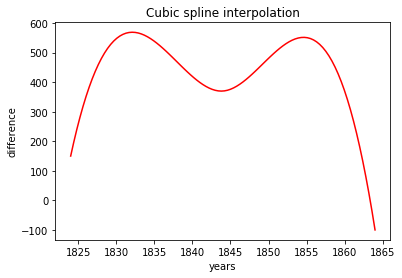

In [69]:
from scipy import interpolate
f_cubic = interpolate.interp1d(np.linspace(1824,1864,5),dy,kind='cubic')
ynew = f_cubic(np.linspace(1824,1864,100))
plt.plot(np.linspace(1824,1864,100),ynew,color='r')
plt.title('Cubic spline interpolation')
plt.xlabel("years")
plt.ylabel("difference")

### 由上面的三次插值结果可以进行预估

In [78]:
def model(x):
    y_predic = f_cubic(np.linspace(1824,1824+x*10,x+1))
    a0 = 125
    i = 0
    while i < x:
        yield a0
        a0 += y_predic[i]
        i += 1
    pass
numNew = np.array([i for i in model(4)])
numNew

array([ 125.,  275.,  830., 1200.])